
# **Problem Statement**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

# **Variables**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **Data Description**

**Demographic**:

• **Sex**: male or female("M" or "F")

• **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**

• **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")

• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
• **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)

• **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)

• **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

• **Diabetes**: whether or not the patient had diabetes (Nominal) Medical(current)

• **Tot Chol**: total cholesterol level (Continuous)

• **Sys BP**: systolic blood pressure (Continuous)

• **Dia BP**: diastolic blood pressure (Continuous)

• **BMI**: Body Mass Index (Continuous)

• **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values).

• **Glucose**: glucose level (Continuous)

# **Predict variable (desired target)**

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

# **Now lets import required libraries**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import plotly.express as px
import time
import random 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

from shapely.geometry import Point,Polygon
import descartes

from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve,precision_recall_curve
from sklearn.metrics import roc_auc_score,recall_score,precision_score
from sklearn.metrics import cohen_kappa_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/Cardiovascular-Risk-Prediction Pratik M Gumble/data_cardiovascular_risk.csv')

# **Data Inspection**

In [4]:
# First look
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [6]:
dataset.shape

(3390, 17)

There are 17 columns and 3390 rows in our dataset

# **Data Cleaning**
Before providing data to a model, it is essential to clean the data and treat the nulls, outliers, duplicate data records.

# Convert NaN values

In [7]:
dataset.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [8]:
dataset['cigsPerDay'].fillna(0, inplace=True)
dataset['BPMeds'].fillna(0, inplace=True)
dataset['totChol'].fillna(0, inplace=True)
dataset['BMI'].fillna(0, inplace=True)
dataset['heartRate'].fillna(0, inplace=True)

In [9]:
mean_value=dataset['glucose'].mean()
dataset['glucose'].fillna(value=mean_value, inplace=True)

Number of NaN values in glucose is 304 so we replace with it mean value.

In [10]:
dataset.isnull().sum()

id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

As number of count of NaN values are not more than 20% so we replace these values with zero instead of mean, median or mode.

In [11]:
dataset = dataset.drop(['id','education'],axis=1)

In [12]:
dataset.shape

(3390, 15)

In [13]:
dataset.describe(include='all')

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390,3390,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
unique,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,NaN,NaN,9.010619,0.029499,0.006490,0.315339,0.025664,234.416814,132.60118,82.883038,25.688437,75.954867,82.086520,0.150737
std,8.592878,NaN,NaN,11.862839,0.169224,0.080309,0.464719,0.158153,51.453991,22.29203,12.023581,4.427674,12.041020,23.131808,0.357846
min,32.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.50000,48.000000,0.000000,0.000000,40.000000,0.000000
25%,42.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.00000,74.500000,22.972500,68.000000,72.000000,0.000000
50%,49.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.365000,75.000000,80.000000,0.000000
75%,56.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000


In [14]:
# duplicate
len(dataset[dataset.duplicated()])

0

**There are no duplicate in our datasets**

In [15]:
dataset.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# **Data encoding**

Before we start predicting, an important step to do is to convert our sex and is_smoking feature, which is a string, into integer. M will be converted to 1 and F will be converted to 0. Same for YES will be converted to 1 and NO will be converted to 0.We will name this new columns a "Sex" and "Smoking".

In [16]:
dataset['sex'] = dataset['sex'].apply(lambda x : 1 if x == "M" else 0)
dataset['is_smoking'] = dataset['is_smoking'].apply(lambda x : 1 if x == "YES" else 0)

In [17]:
dataset.head(10)

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,0.00,90.0,80.00000,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.00000,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.00000,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.00000,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.00000,0
5,61,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.00000,1
6,61,1,0,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.00000,0
7,36,1,1,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.00000,0
8,41,0,1,20.0,0.0,0,0,0,220.0,126.0,78.0,20.70,86.0,79.00000,0
9,55,0,0,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,82.08652,0


# **Exploring Dependent Variable**


In [18]:
dataset['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

From the graph and statistical analysis it is clear that most of the people in the dataset have not 10-year risk of coronary heart disease CHD(2879 peoples) and 511 peoples have 10-year risk of coronary heart disease CHD.

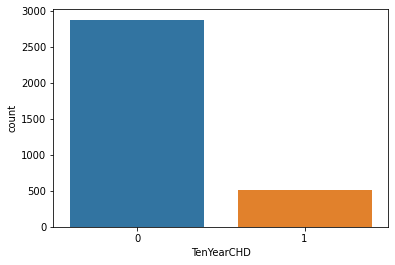

In [19]:
sns.countplot(x=dataset['TenYearCHD'])

Here we see that observation in one class is higher than the observation in 


other classes then there exists a class imbalance.Such data set is known as an imbalanced dataset in which the class having more data points is the majority class and the other is the minority class.

The imbalance makes the classification more challenging. Whenever we build a classifier with such data, it works well with the majority class but gives a poor performance with the minority class. Although, the model performance concerning the minority class matters the most. Some Machine Learning algorithms are more sensitive toward imbalanced data, such as Logistic Regression and Support Vector Machine. However, some algorithms tackle this issue themselves, such as Random Forest and XGBoost.

Sampling technique comes to save us and deal with imbalanced data.

There are two sampling techniques available to handle the imbalanced data:

Under Sampling Over Sampling

Here we choose Oversampling technique as Unlike under-sampling, this method leads to no information loss.

We apply this technique latter part

# **Exploratory Data Analysis**

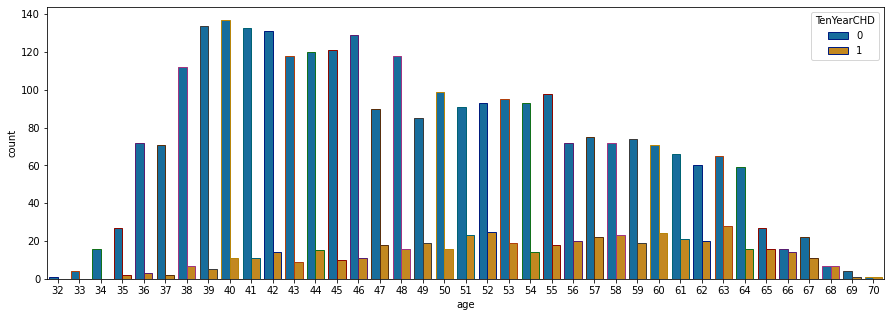

In [20]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(x='age',hue='TenYearCHD',data=dataset,palette='colorblind',edgecolor=sns.color_palette('dark'))

From the count plot we can see at the age of 63, there are high risk for 10-year risk of coronary heart disease CHD and at the age from 32 to 34 very less risk for 10-year risk of coronary heart disease CHD.

Percentage of Senior people lose their life : 29.22077922077922


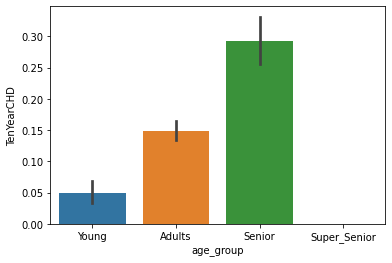

In [21]:
bins = [20,40,60, 80, np.nan]
labels = ['Young','Adults', 'Senior', 'Super_Senior']

dataset['age_group'] = pd.cut(dataset['age'], bins=bins, labels=labels)

print('Percentage of Senior people lose their life :', dataset['TenYearCHD'][dataset['age_group']=='Senior'].value_counts(normalize=True)[1]*100)

sns.barplot(x='age_group', y='TenYearCHD', data=dataset)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


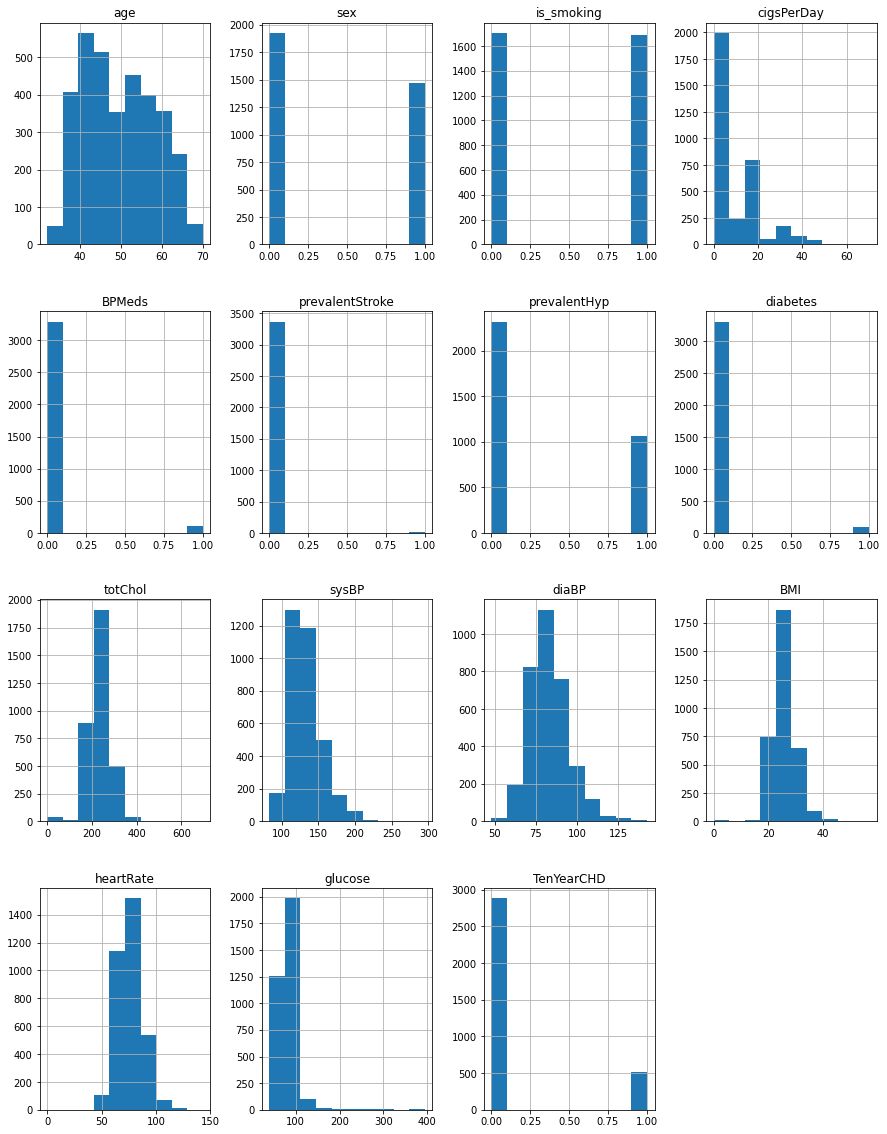

In [22]:
# understanding distribution of data before imputation
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)
plt.show()

A histogram is a graph showing frequency distributions. It is a graph showing the number of observations within each given interval.With Histograms we can see the shape of each feature and provides the count of number of observations in each bin.

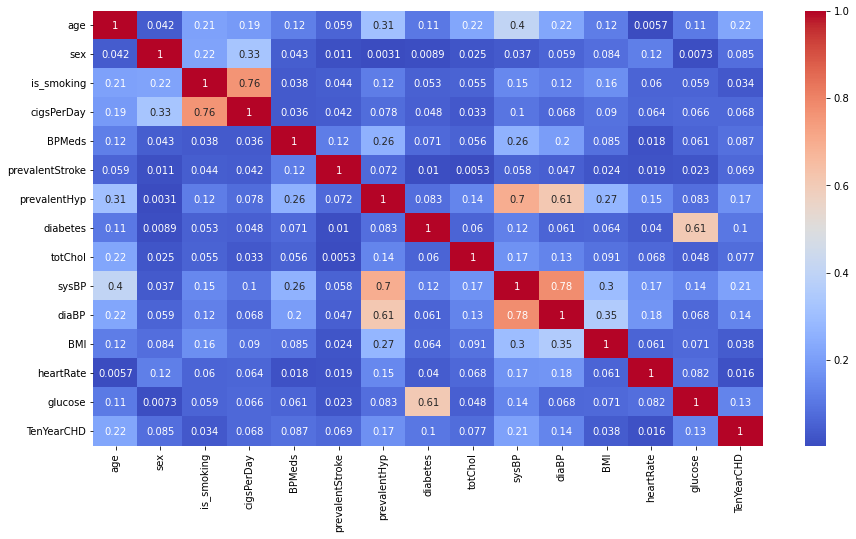

In [23]:
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

We can see there is a positive correlation between age,glucose,diaBP,SysBP,Diabetes,pravalentHyp with TenYearCHD . This makes sense since, all these features increases a greater chance of having heart disease

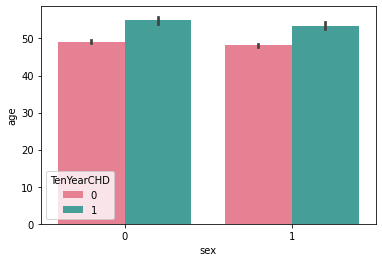

In [24]:
sns.barplot(data=dataset,x='sex',y='age',hue='TenYearCHD',palette='husl')

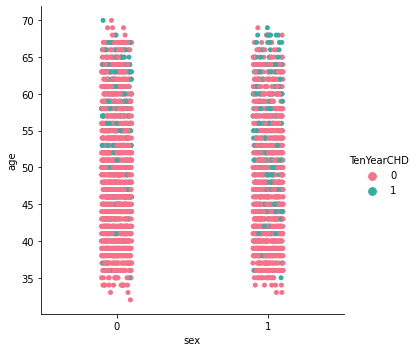

In [25]:
sns.catplot(data=dataset,x='sex',y='age',hue='TenYearCHD',palette='husl')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


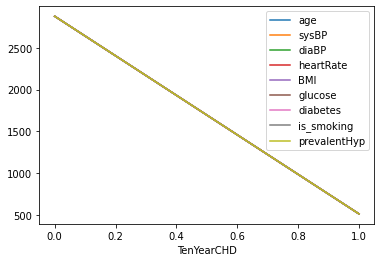

In [26]:
dataset.groupby(['TenYearCHD'])['age','sysBP','diaBP','heartRate','BMI','glucose','diabetes','is_smoking','prevalentHyp'].count().sort_values(by='TenYearCHD',ascending=False).head(10).plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


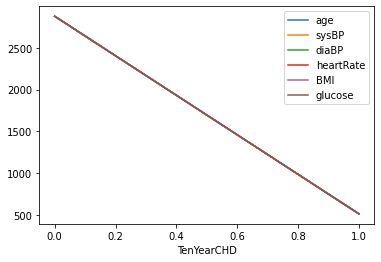

In [27]:
dataset.groupby(['TenYearCHD'])['age','sysBP','diaBP','heartRate','BMI','glucose'].count().sort_values(by='TenYearCHD',ascending=False).head(10).plot()

In [28]:
dataset = dataset.drop(['age_group'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


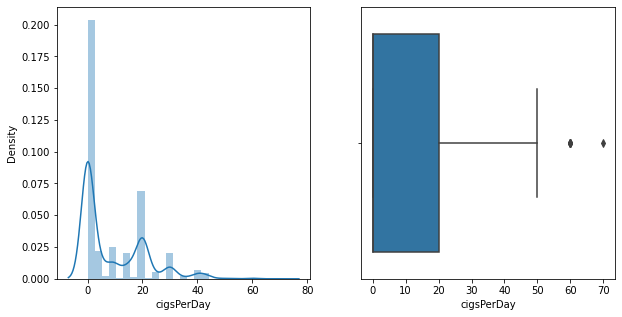

In [29]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['cigsPerDay'], ax=axes[0])
sns.boxplot(dataset['cigsPerDay'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


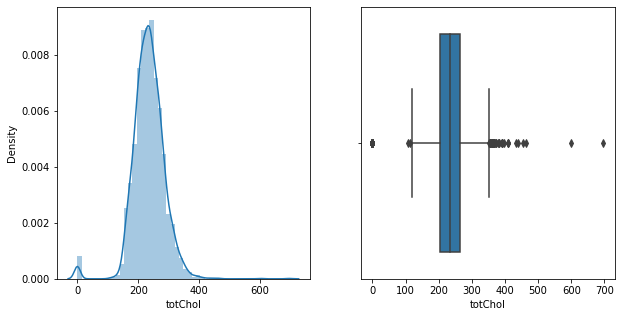

In [30]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['totChol'], ax=axes[0])
sns.boxplot(dataset['totChol'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


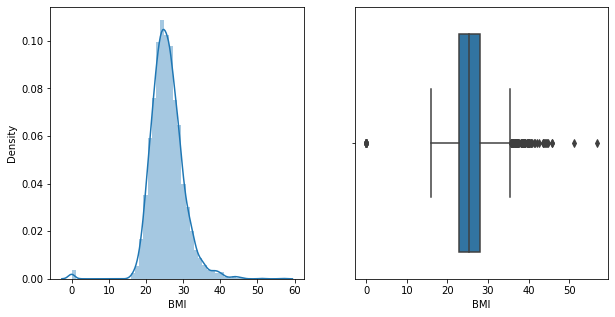

In [31]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['BMI'], ax=axes[0])
sns.boxplot(dataset['BMI'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


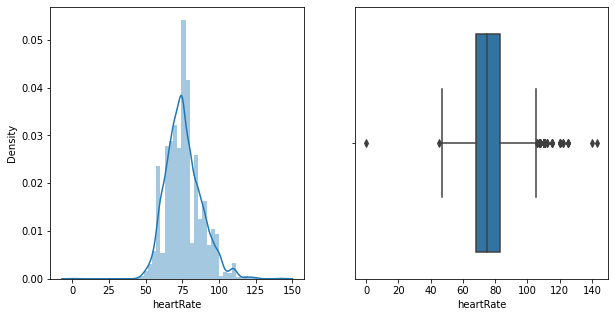

In [32]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['heartRate'], ax=axes[0])
sns.boxplot(dataset['heartRate'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


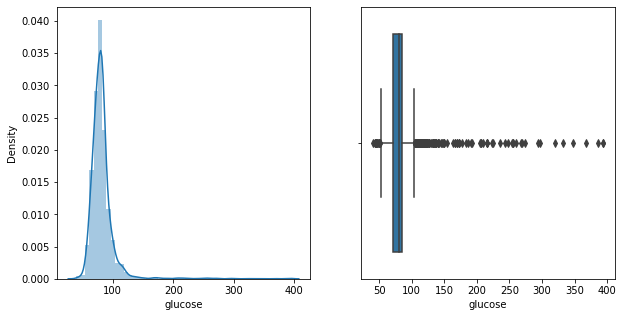

In [33]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['glucose'], ax=axes[0])
sns.boxplot(dataset['glucose'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


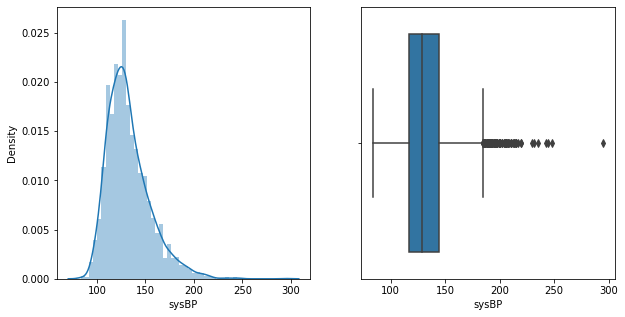

In [34]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['sysBP'], ax=axes[0])
sns.boxplot(dataset['sysBP'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


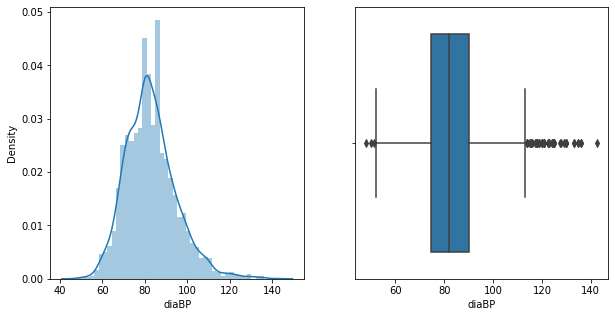

In [35]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['diaBP'], ax=axes[0])
sns.boxplot(dataset['diaBP'], ax=axes[1])

From the box plots, outliers are present in cigsPerDay,totchol,BMI,Heart rate,glucose,sysBP,diaBP.

The Outliers are removed using two methods,

Inter-Quartile Range
In IQR, the data points higher than the upper limit and lower than the lower limit are considered outliers.

upper limit = Q3 + 1.5 * IQR

lower limit = Q1 – 1.5 * IQR 2. Z-Score

In [36]:
from scipy.stats import zscore
from scipy import stats

In [37]:
#Removing outliers using Z-score
z = np.abs(stats.zscore(dataset))
dataset2 = dataset[(z<3).all(axis=1)]
dataset2.shape

(3046, 15)

In [38]:
#find Q1, Q3, and interquartile range for each column
Q1 = dataset.quantile(q=.25)
Q3 = dataset.quantile(q=.75)
IQR = dataset.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = dataset[~((dataset < (Q1-1.5*IQR)) | (dataset > (Q3+1.5*IQR))).any(axis=1)]

In [39]:
data_clean.shape

(2439, 15)

data_clean.shape
data_clean.shape
After using Z socre to detect and remove outliers, the number of records in dataset is 2439, 15. As number of reocrds available is higher after z Score, we will proceed with z score

# **Lets split the data into train and test data**

In [40]:
dataset2.tail(10)


,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3379,39,1,1,30.0,0.0,0,0,0,292.0,120.0,85.0,31.09,85.0,82.08652,0
3380,56,0,1,20.0,0.0,0,0,0,240.0,125.0,79.0,27.38,80.0,82.00000,0
3381,63,0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.00000,1
3382,43,1,0,0.0,0.0,0,1,0,260.0,129.0,90.0,25.29,70.0,62.00000,0
3383,57,0,0,0.0,0.0,0,0,0,210.0,131.0,85.0,26.59,70.0,77.00000,0
3384,61,0,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.00000,0
3385,60,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.00000,0
3386,46,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.00000,0
3388,60,1,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.00000,0
3389,54,0,0,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.00000,0


In [41]:
dataset2.head(10)


,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.00000,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.00000,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.00000,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.00000,0
7,36,1,1,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.00000,0
8,41,0,1,20.0,0.0,0,0,0,220.0,126.0,78.0,20.70,86.0,79.00000,0
9,55,0,0,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,82.08652,0
11,53,0,0,0.0,0.0,0,0,0,210.0,138.0,86.5,22.49,88.0,87.00000,0
12,43,0,0,0.0,0.0,0,0,0,213.0,96.0,62.0,19.38,74.0,80.00000,0
13,44,1,1,40.0,0.0,0,0,0,227.0,146.5,97.0,26.92,80.0,67.00000,0


In [42]:
# Data for all the independent variables
X = dataset2.drop('TenYearCHD',axis=1)

# Data for the dependent variable
Y = dataset2['TenYearCHD']

In [43]:
X.shape, Y.shape


((3046, 14), (3046,))

Now to overcome data imbalance we apply Oversampling. In oversampling we use SMOTE.It stands for Synthetic Minority Oversampling Technique.

SMOTE selects the nearest examples in the feature space, then draws a line between them, and at a point along the line, it creates a new sample.

“First of all, SMOTE picks an instance randomly from the minority class. Then it finds its k nearest neighbors from the minority class itself. Then one of the neighbors gets chosen randomly and draws the line between these two instances. Then new synthetic examples are generated using a convex combination of these two instances.”

In [46]:
# import library
from collections import Counter 
from imblearn.over_sampling import SMOTE
num_before = dict(Counter(Y))
from imblearn.over_sampling import SMOTE
num_after =dict(Counter(y_smote))

In [47]:
# fit predictor and target variable
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, Y)


print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 2646, 1: 400})
Resample dataset shape Counter({0: 2646, 1: 2646})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


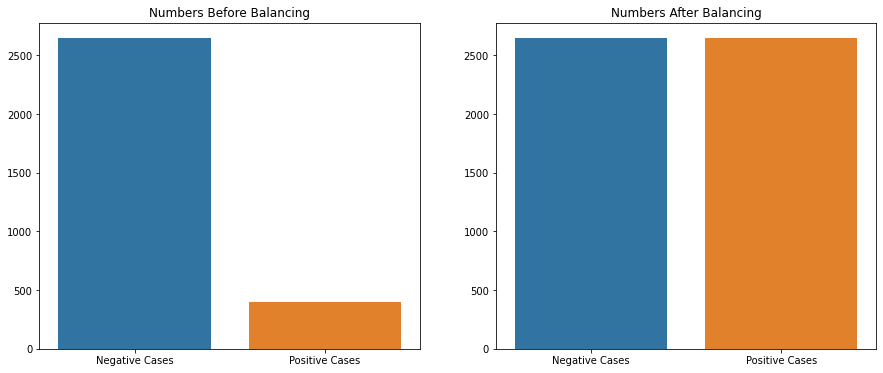

In [48]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size=0.25,random_state=1)


In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We do scaling to bring all the values to the same magnitude. Scaling or Standardization is brings the mean to zero and standard deviation to ‘one’. It assumes a Gaussian distribution. We perform Scaling to avoid biased predictions

In [51]:
# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(3969, 14) (3969,)
(1323, 14) (1323,)


In [52]:
print('Train', Counter(y_train))

Train Counter({1: 2021, 0: 1948})


In [53]:
print('Train', Counter(y_test))

Train Counter({0: 698, 1: 625})


# **Filtering data by positive & negative Heart Disease patient**

In [54]:
# Filtering data by POSITIVE Heart Disease patient
pos_data = dataset2[dataset2['TenYearCHD']==1]
pos_data.describe()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,400.000000,400.000000,400.000000,400.000000,400.0,400.0,400.000000,400.0,400.000000,400.00000,400.00000,400.00000,400.000000,400.000000,400.0
mean,53.480000,0.560000,0.565000,11.590000,0.0,0.0,0.417500,0.0,244.492500,138.04750,84.43625,25.99425,75.570000,80.740840,1.0
std,8.202915,0.497009,0.496378,12.991491,0.0,0.0,0.493764,0.0,44.445737,20.83989,11.74490,3.96483,11.312605,13.800586,0.0
min,35.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,124.000000,83.50000,48.00000,15.96000,50.000000,45.000000,1.0
25%,47.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,214.750000,123.00000,76.00000,23.10000,68.000000,72.000000,1.0
50%,54.000000,1.000000,1.000000,6.500000,0.0,0.0,0.000000,0.0,241.000000,135.00000,83.25000,25.86000,75.000000,79.000000,1.0
75%,60.000000,1.000000,1.000000,20.000000,0.0,0.0,1.000000,0.0,272.000000,152.00000,92.00000,28.67250,82.000000,87.000000,1.0
max,69.000000,1.000000,1.000000,43.000000,0.0,0.0,1.000000,0.0,380.000000,198.00000,116.00000,38.39000,110.000000,137.000000,1.0


It summarizes the count, mean, standard deviation, min, and max for patient having 10-year risk of coronary heart disease CHD

In [55]:
# Filtering data by NEGATIVE Heart Disease patient
pos_data = dataset2[dataset2['TenYearCHD']==0]
pos_data.describe()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2646.000000,2646.000000,2646.000000,2646.000000,2646.0,2646.0,2646.000000,2646.0,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.0
mean,48.360922,0.423658,0.495843,8.624339,0.0,0.0,0.250945,0.0,233.869615,128.744898,81.359033,25.419403,75.504913,79.501474,0.0
std,8.301600,0.494231,0.500077,11.228888,0.0,0.0,0.433639,0.0,41.979201,18.620428,10.596035,3.648613,11.403138,12.042030,0.0
min,32.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,113.000000,83.500000,50.000000,16.480000,45.000000,40.000000,0.0
25%,41.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,204.000000,115.000000,73.500000,22.880000,68.000000,72.000000,0.0
50%,47.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,232.000000,126.000000,81.000000,25.090000,75.000000,79.000000,0.0
75%,55.000000,1.000000,1.000000,20.000000,0.0,0.0,1.000000,0.0,261.000000,139.000000,87.500000,27.627500,82.000000,85.000000,0.0
max,69.000000,1.000000,1.000000,43.000000,0.0,0.0,1.000000,0.0,382.000000,199.000000,118.000000,38.960000,112.000000,142.000000,0.0


From comparing positive and negative patients we can see there are vast differences in means for many of our 14 Features.

# **Now Lets implement 5 models on our dataset:**

Now Lets implement 4 models on our dataset:

> Logistic Regression

> Random Forrest

> XGBoost

> K-NN

> SVM

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [105]:
pip install scikit_optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import numpy as np
from skopt import gp_minimize

In [59]:
import skopt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn import ensemble

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [108]:
lr = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42)
knn = KNeighborsClassifier(n_neighbors=7)
SVM = SVC(kernel = 'rbf', random_state = 0)

# **Logistic Regression**

In [62]:
lr.fit(X_train,y_train)

LogisticRegression()

In [63]:
train_preds_lr = lr.predict_proba(X_train)
test_preds_lr= lr.predict_proba(X_test)

In [64]:
train_preds_lr

array([[0.20513252, 0.79486748],
       [0.80526383, 0.19473617],
       [0.43076624, 0.56923376],
       ...,
       [0.3063234 , 0.6936766 ],
       [0.6061443 , 0.3938557 ],
       [0.43593698, 0.56406302]])

In [65]:
test_preds_lr

array([[0.60236845, 0.39763155],
       [0.24945626, 0.75054374],
       [0.53896188, 0.46103812],
       ...,
       [0.49036507, 0.50963493],
       [0.52686081, 0.47313919],
       [0.72723498, 0.27276502]])

In [66]:
y_pred_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

In [67]:
accuracy_lr=accuracy_score(y_pred_lr, y_test)

In [68]:
accuracy_lr

0.673469387755102

In [69]:
from sklearn import metrics

In [70]:
print(metrics.classification_report(y_pred_lr, y_test))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       654
           1       0.69      0.64      0.67       669

    accuracy                           0.67      1323
   macro avg       0.67      0.67      0.67      1323
weighted avg       0.67      0.67      0.67      1323



Precision is 1 means 100 percent it predicted correctly that people not 10-year risk of coronary heart disease from all the cases of people actully not 10-year risk of coronary heart disease similarly as in people who have 10-year risk of coronary heart are 2 but it predicted 0 that they 10-year RCHD so its precision is low

Recall= peolple truly predicted who not 10-year RCHD /people who predicted 10-year RCHD hence it is 655/(655+107)=0.8595 similarly for people who 10-year RCHD.

The F1 score is calculated based on the precision and recall of each class. It is the weighted average of the Precision and the recall scores. The F1 score reaches its perfect value at one and worst at 0.It is a very good way to show that a classifies has a good recall and precision values.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. The area under the curve is then the approximate integral under the ROC Curve.

In our case our auc-roc value is 0.68 so we caan say that our model predicted the classes in a good manner.

# **Random Forest**

In [71]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [72]:
train_preds_rf =rf.predict_proba(X_train)
test_preds_rf= rf.predict_proba(X_test)

In [73]:
y_pred_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train)

In [74]:
print(metrics.classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       656
           1       0.93      0.87      0.90       667

    accuracy                           0.90      1323
   macro avg       0.90      0.90      0.90      1323
weighted avg       0.90      0.90      0.90      1323



# **XG Boost Classifier**

In [75]:
xgb.fit(X_train,y_train)

XGBClassifier(nthread=4, seed=42)

In [76]:
train_preds_xgb =xgb.predict_proba(X_train)
test_preds_xgb= xgb.predict_proba(X_test)

In [77]:
y_pred_xgb = xgb.predict(X_test)
y_pred_train_xgb = xgb.predict(X_train)

In [78]:
print(metrics.classification_report(y_pred_xgb, y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       681
           1       0.81      0.79      0.80       642

    accuracy                           0.81      1323
   macro avg       0.81      0.81      0.81      1323
weighted avg       0.81      0.81      0.81      1323



# **KNN Classifier**

In [79]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [80]:
train_preds_knn =knn.predict_proba(X_train)
test_preds_knn= knn.predict_proba(X_test)

In [81]:
y_pred_knn = knn.predict(X_test)
y_pred_train_knn = knn.predict(X_train)

In [85]:
print(metrics.classification_report(y_pred_knn, y_test))

              precision    recall  f1-score   support

           0       0.63      0.88      0.73       502
           1       0.90      0.69      0.78       821

    accuracy                           0.76      1323
   macro avg       0.77      0.78      0.76      1323
weighted avg       0.80      0.76      0.76      1323



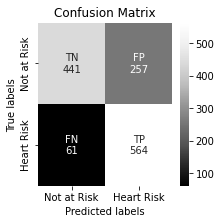

In [87]:
# Get the confusion matrix for test
plt.figure(figsize=(3,3))
labels = ['Not at Risk','Heart Risk' ]
cm = confusion_matrix(y_test, y_pred_knn)

cat = ['TN','FP','FN','TP']
#cat = np.asarray(labels2).reshape(2,2)
counts = [count for count in cm.flatten()]
labelsIn = [f"{v1}\n{v2}" for v1, v2 in  zip(cat,counts)]

labelsIn = np.asarray(labelsIn).reshape(2,2)

ax= plt.subplot()
sns.heatmap(cm, annot=labelsIn, cmap='Greys_r', fmt='')


# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(labels);
ax.yaxis.set_ticklabels(labels);

In [88]:
## Calculate the diff Metrics
roc_auc = roc_auc_score(y_test, y_pred_knn)
print("ROC-AUC: {:.3f}".format(roc_auc))
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print ("F1-Score {:.3f}".format(2*precision*recall/(recall+precision)))
accuracy =accuracy_score(y_test, y_pred_knn)
print("Accuracy {:.3f}".format(accuracy))
print("Cohen's Kappa Score {:.3f}".format(cohen_kappa_score(y_test, y_pred_knn)))

ROC-AUC: 0.767
Precision: 0.687
Recall: 0.902
F1-Score 0.780
Accuracy 0.760
Cohen's Kappa Score 0.526


# **hyperparameter optimization**

In [89]:
#Define hyper parameters to tune
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import numpy as np
grid_params = { 'n_neighbors' : [5,7,9,11,13],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
knn = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5, n_jobs = -1)

In [91]:
# fit the model on our train set
g_res = knn.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [92]:
#best parameters
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [93]:
# find the best score
g_res.best_score_

0.8032221484589656

In [95]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [96]:
## Calculate the diff Metrics
roc_auc = roc_auc_score(y_test, y_knn)
print("ROC-AUC: {:.3f}".format(roc_auc))
precision = precision_score(y_test, y_knn)
recall = recall_score(y_test, y_knn)
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print ("F1-Score {:.3f}".format(2*precision*recall/(recall+precision)))
accuracy =accuracy_score(y_test, y_knn)
print("Accuracy {:.3f}".format(accuracy))
print("Cohen's Kappa Score {:.3f}".format(cohen_kappa_score(y_test, y_knn)))

ROC-AUC: 0.824
Precision: 0.729
Recall: 0.970
F1-Score 0.832
Accuracy 0.816
Cohen's Kappa Score 0.636


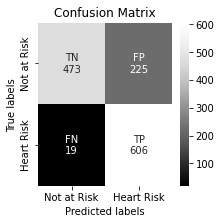

In [97]:
# Get the confusion matrix for test
plt.figure(figsize=(3,3))
labels = ['Not at Risk','Heart Risk' ]
cm = confusion_matrix(y_test, y_knn)

cat = ['TN','FP','FN','TP']
#cat = np.asarray(labels2).reshape(2,2)
counts = [count for count in cm.flatten()]
labelsIn = [f"{v1}\n{v2}" for v1, v2 in  zip(cat,counts)]

labelsIn = np.asarray(labelsIn).reshape(2,2)

ax= plt.subplot()
#sns.heatmap(cm, annot=labelsIn, ax = ax,fmt='', cmap='Blues');

sns.heatmap(cm, annot=labelsIn, cmap='Greys_r', fmt='')

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(labels);
ax.yaxis.set_ticklabels(labels);

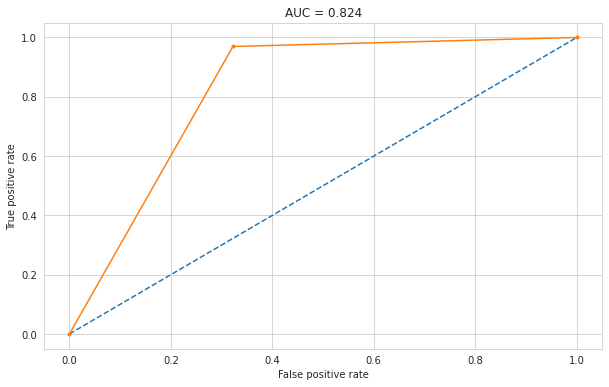

In [103]:
# ROC curve and AUC 

# calculate AUC
log_auc = roc_auc_score(y_test, y_knn)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_knn)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

# **Support Vector Machine (SVM)**

Training the SVM model on the Training set

In [110]:
SVM = SVC(kernel = 'rbf', random_state = 0)
SVM.fit(X_train, y_train)

SVC(random_state=0)

In [113]:
# Get the predicted class and confusion matrix
y_preds_svm = SVM.predict(X_test)

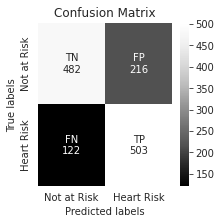

In [114]:
# Get the confusion matrix for test
plt.figure(figsize=(3,3))
labels = ['Not at Risk','Heart Risk' ]
cm = confusion_matrix(y_test, y_preds_svm)

cat = ['TN','FP','FN','TP']
#cat = np.asarray(labels2).reshape(2,2)
counts = [count for count in cm.flatten()]
labelsIn = [f"{v1}\n{v2}" for v1, v2 in  zip(cat,counts)]

labelsIn = np.asarray(labelsIn).reshape(2,2)

ax= plt.subplot()

sns.heatmap(cm, annot=labelsIn, cmap='Greys_r', fmt='')

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(labels);
ax.yaxis.set_ticklabels(labels);

In [115]:
## Calculate the diff Metrics
roc_auc = roc_auc_score(y_test, y_preds_svm)
print("ROC-AUC: {:.3f}".format(roc_auc))
precision = precision_score(y_test, y_preds_svm)
recall = recall_score(y_test, y_preds_svm)
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print ("F1-Score {:.3f}".format(2*precision*recall/(recall+precision)))
accuracy =accuracy_score(y_test, y_preds_svm)
print("Accuracy {:.3f}".format(accuracy))
print("Cohen's Kappa Score {:.3f}".format(cohen_kappa_score(y_test, y_preds_svm)))

ROC-AUC: 0.748
Precision: 0.700
Recall: 0.805
F1-Score 0.749
Accuracy 0.745
Cohen's Kappa Score 0.491


In [117]:
#Define hyper parameters to tune

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train )

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   3.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.537 total time=   2.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.531 total time=   3.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.537 total time=   1.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.540 total time=   0.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.705 total time=   0.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.699 total time=   0.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.712 total time=   0.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.697 total time=   0.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.673 total time=   0.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [118]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [120]:
# Predict the test data set class
grid_predictions = grid.predict(X_test)

In [121]:
## Calculate the diff Metrics
roc_auc = roc_auc_score(y_test, grid_predictions)
print("ROC-AUC: {:.3f}".format(roc_auc))
precision = precision_score(y_test, grid_predictions)
recall = recall_score(y_test, grid_predictions)
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print ("F1-Score {:.3f}".format(2*precision*recall/(recall+precision)))
accuracy =accuracy_score(y_test, grid_predictions)
print("Accuracy {:.3f}".format(accuracy))
print("Cohen's Kappa Score {:.3f}".format(cohen_kappa_score(y_test, grid_predictions)))

ROC-AUC: 0.908
Precision: 0.886
Recall: 0.922
F1-Score 0.904
Accuracy 0.907
Cohen's Kappa Score 0.814


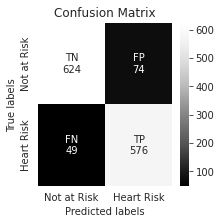

In [122]:
# Get the confusion matrix for test
plt.figure(figsize=(3,3))
labels = ['Not at Risk','Heart Risk' ]
cm = confusion_matrix(y_test, grid_predictions)

cat = ['TN','FP','FN','TP']
#cat = np.asarray(labels2).reshape(2,2)
counts = [count for count in cm.flatten()]
labelsIn = [f"{v1}\n{v2}" for v1, v2 in  zip(cat,counts)]

labelsIn = np.asarray(labelsIn).reshape(2,2)

ax= plt.subplot()
sns.heatmap(cm, annot=labelsIn,cmap='Greys_r', fmt='')

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(labels);
ax.yaxis.set_ticklabels(labels);

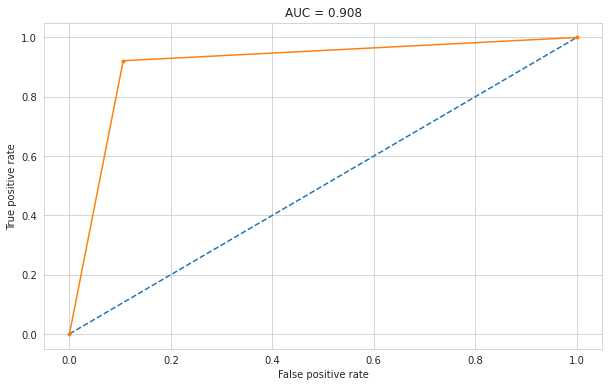

In [123]:
# ROC curve and AUC 

# calculate AUC
log_auc = roc_auc_score(y_test, grid_predictions)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, grid_predictions)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

# **Now lets Collect all the models!**

In [124]:
models=[lr,rf,xgb,knn,SVM]

In [125]:
def search_metric(models,X_train, X_test, y_train, y_test):
  
  cols = ['Train accuracy', 'Test accuracy', 'Train precision', 'Test precision', 'Train recall', 'Test recall',
          'Train f1 score', 'Test f1 score', 'Train ROC-AUC', 'Test ROC-AUC']
  model_df = pd.DataFrame(columns=cols)
  conf_train, conf_test = {}, {}
  i = 0
  for model in models:

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    model_df.loc[i,'Train accuracy'] = metrics.accuracy_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test accuracy'] = metrics.accuracy_score( y_test, y_pred_test).round(2)
    model_df.loc[i,'Train precision'] = metrics.precision_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test precision'] = metrics.precision_score( y_test, y_pred_test).round(2)
    model_df.loc[i,'Train recall'] = metrics.recall_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test recall'] = metrics.recall_score(y_test, y_pred_test).round(2)
    model_df.loc[i,'Train f1 score'] = metrics.f1_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test f1 score'] = metrics.f1_score(y_test, y_pred_test).round(2)
    model_df.loc[i,'Train ROC-AUC'] = metrics.roc_auc_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test ROC-AUC'] = metrics.roc_auc_score( y_test, y_pred_test).round(2)
    conf_train[model.__class__.__name__] = confusion_matrix(y_train, y_pred_train)
    conf_test[model.__class__.__name__] = confusion_matrix(y_test, y_pred_test)
    i+=1
  return model_df,conf_train, conf_test

In [126]:
model_df,conf_train,conf_test=search_metric(models,X_train, X_test, y_train, y_test)

In [127]:
model_df

,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score,Train ROC-AUC,Test ROC-AUC
0,0.69,0.67,0.68,0.64,0.72,0.69,0.7,0.67,0.69,0.67
1,1.0,0.9,1.0,0.88,1.0,0.93,1.0,0.9,1.0,0.91
2,0.86,0.81,0.85,0.79,0.87,0.81,0.86,0.8,0.86,0.81
3,0.83,0.76,0.77,0.69,0.94,0.9,0.85,0.78,0.83,0.77
4,0.78,0.74,0.76,0.7,0.84,0.8,0.8,0.75,0.78,0.75


In [128]:
for key, value in conf_train.items():
  print(f'Confusion matrix for {key} :\n{value}')

Confusion matrix for LogisticRegression :
[[1271  677]
 [ 567 1454]]
Confusion matrix for RandomForestClassifier :
[[1948    0]
 [   0 2021]]
Confusion matrix for XGBClassifier :
[[1644  304]
 [ 268 1753]]
Confusion matrix for KNeighborsClassifier :
[[1379  569]
 [ 117 1904]]
Confusion matrix for SVC :
[[1404  544]
 [ 326 1695]]


In [129]:

for key, value in conf_test.items():
  print(f'Confusion matrix for {key} :\n{value}')

Confusion matrix for LogisticRegression :
[[460 238]
 [194 431]]
Confusion matrix for RandomForestClassifier :
[[615  83]
 [ 44 581]]
Confusion matrix for XGBClassifier :
[[564 134]
 [117 508]]
Confusion matrix for KNeighborsClassifier :
[[441 257]
 [ 61 564]]
Confusion matrix for SVC :
[[482 216]
 [122 503]]


# **Predictive Model**

Predictive model help us to understand possible future occurrences by analysing our existance model.Predictive models make assumptions based on what has happened in the past and what is happening now. If incoming, new data shows changes in what is happening now, the impact on the likely future outcome must be recalculated, too.

In [130]:
def predictive_model(models,input_data):
  i = 0
  for model in models:
    input_data_numpy=np.asarray(input_data)
    #Reshaped data
    reshaped_input_data=input_data_numpy.reshape(1,-1)
    prediction=model.predict(reshaped_input_data)
    print(prediction)
    if(prediction[0]==0):
      print('The Person does not have Cardiovascular Risk for next 10 years')
    else:
      print('The Person have Cardiovascular Risk for next 10 years')
  
    i+=1 

In [131]:
input_data1=(63	,0,	0	,0.0,	0.0	,0,	0	,0,	205.0,	138.0,	71.0,	33.11,	60.0,	85.00000)

In [132]:
df=predictive_model(models,input_data1)


[1]
The Person have Cardiovascular Risk for next 10 years
[1]
The Person have Cardiovascular Risk for next 10 years
[1]
The Person have Cardiovascular Risk for next 10 years
[1]
The Person have Cardiovascular Risk for next 10 years
[0]
The Person does not have Cardiovascular Risk for next 10 years


In [133]:
input_data0=(54,1,1,3.0,0.0,0,1,0,279.0,155.0,105.0,26.47,78.0,66.00000)


In [134]:
df1=predictive_model(models,input_data0)


[1]
The Person have Cardiovascular Risk for next 10 years
[0]
The Person does not have Cardiovascular Risk for next 10 years
[1]
The Person have Cardiovascular Risk for next 10 years
[1]
The Person have Cardiovascular Risk for next 10 years
[0]
The Person does not have Cardiovascular Risk for next 10 years


# **Feature Importances**

Feature (variable) importance indicates how much each feature contributes to the model prediction. Basically, it determines the degree of usefulness of a specific variable for a current model and prediction.

Analyzing feature importance , we would be able to find out irrelevant features and exclude them. Reducing the number of not meaningful variables in the model may speed up the model or even improve its performance.

In [135]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


In [136]:
import shap
shap.initjs()

In [137]:
model11=[rf,xgb,knn,SVM]

In [138]:
def shap_training_model(model11):
  i = 0
  for model in model11:
   explainer_train = shap.TreeExplainer(rf)
   shap_values_train = explainer_train.shap_values(X_train) 
   shap.summary_plot(shap_values_train[1],X_train,plot_type='dot')
  i+=1  


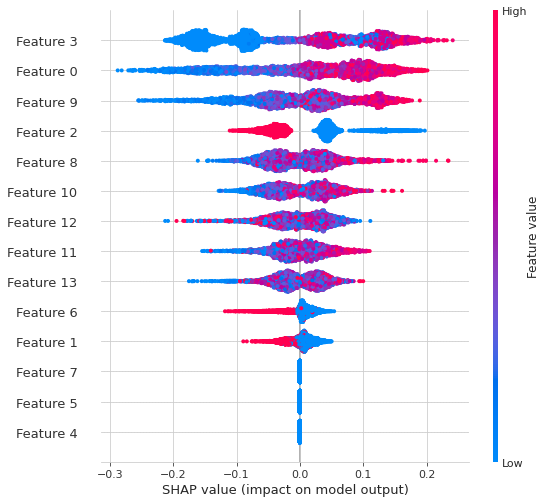

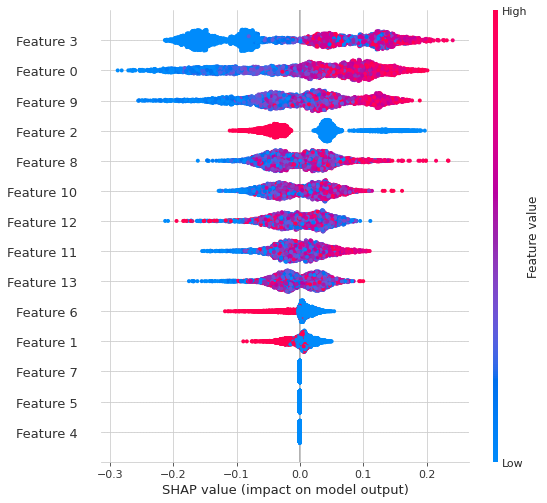

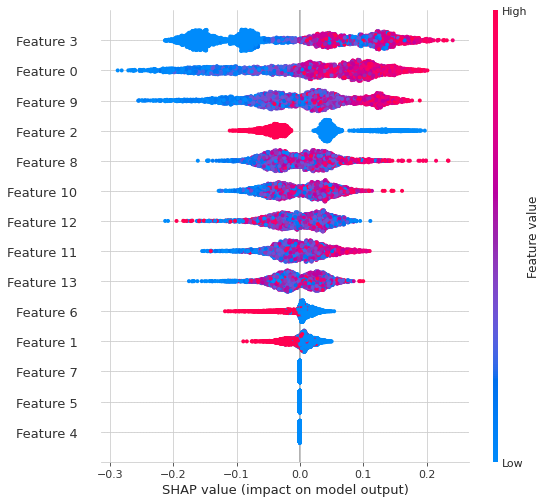

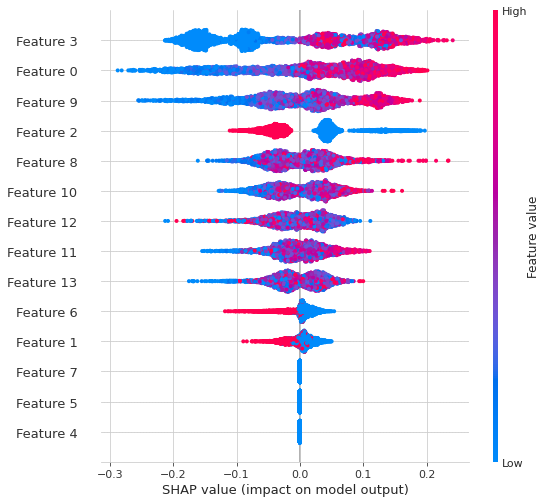

In [139]:
shap_training_model(model11)

In [141]:
def shap_testing_model(model11):
  i = 0
  for model in model11:
   explainer_test = shap.TreeExplainer(rf)
   shap_values_test = explainer_test.shap_values(X_test) 
   shap.summary_plot(shap_values_test[1],X_test,plot_type='dot')
  i+=1

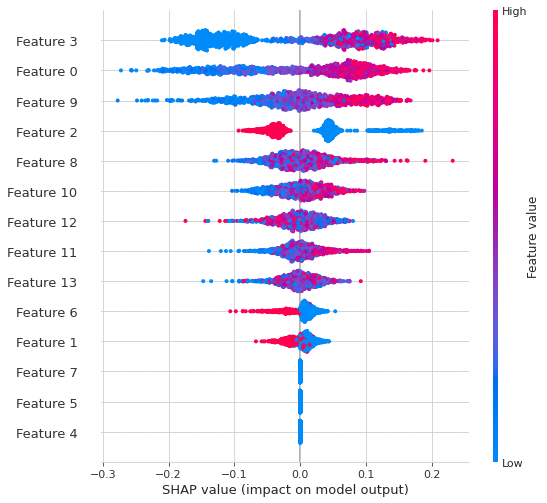

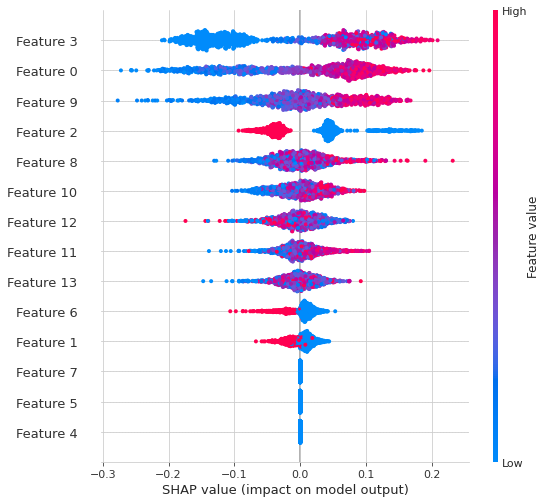

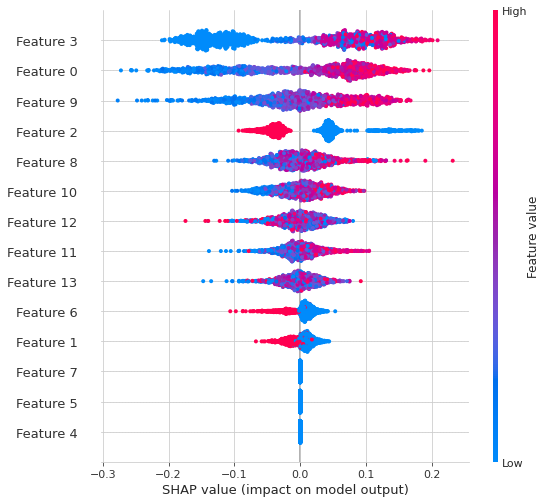

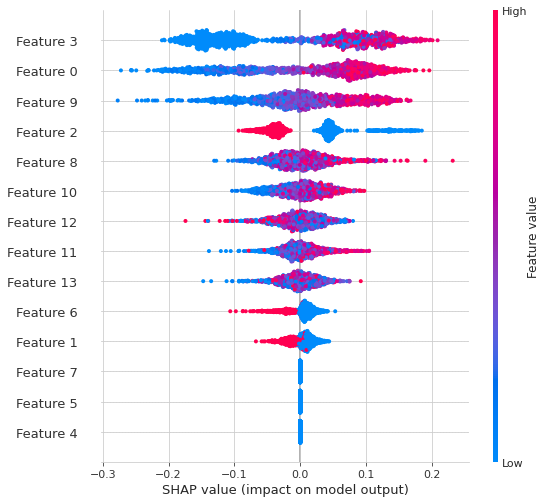

In [142]:
shap_testing_model(model11)

In logistive regression CigsPerDay,age,sysBP,diaBP,tatchol,heartrate,BMI,glucose are the important feature to detrmine person having 10 year risk for heart diasease or not. Out of that CigsPerDay,age and BP are the most important feature which decided the person having chance of 10 year heart diaseases or not.

# **Logistic Regression**

In [143]:
explainer_train = shap.TreeExplainer(rf)
shap_values_train = explainer_train.shap_values(X_train)

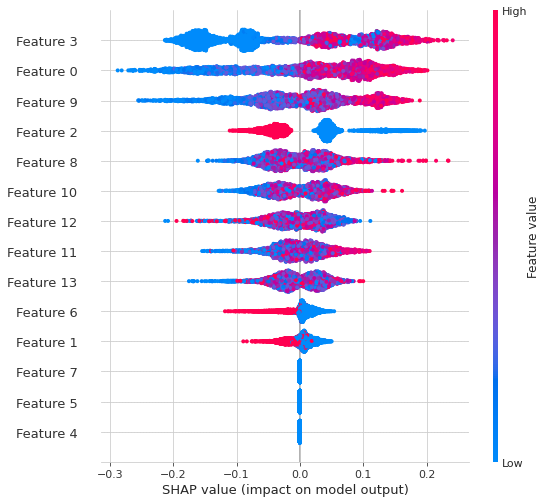

In [144]:
shap.summary_plot(shap_values_train[1],X_train,plot_type='dot')

In [145]:
explainer_test = shap.TreeExplainer(rf)
shap_values_test = explainer_test.shap_values(X_test)

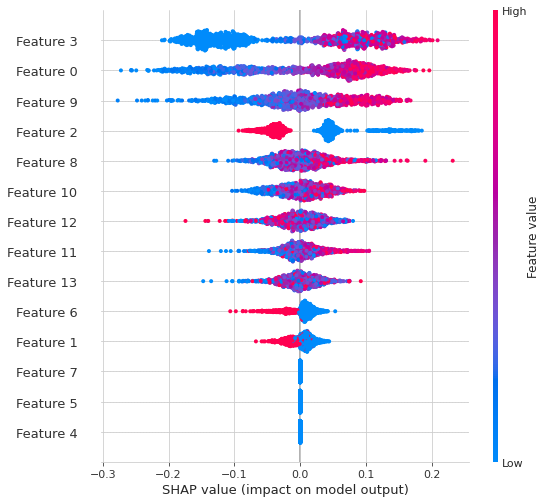

In [146]:
shap.summary_plot(shap_values_test[1],X_test,plot_type='dot')

In logistic regression also CigsPerDay,age,sysBP,diaBP,tatchol,heartrate,BMI,glucose are the important feature to detrmine person having 10 year risk for heart diasease or not. Out of that CigsPerDay,age and BP are the most important feature which decided the person having chance of 10 year heart diaseases or not.

# **Conclusion**

After implementing four classification models and comparing their accuracy and other scores, we can conclude that for this dataset Random forest Classifier is the appropriate model to be used.